In [1]:
#PERFORMING EDA ON BMW CAR MODEL DATA SET

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
#Data Cleaning and Transformations

df = pd.read_csv("data.csv")

#Dropping Irrevelant Columns
df.drop(["Market Category","Number of Doors","Popularity"], axis='columns',inplace=True)

#Renaming Columns
df.rename(columns={"Engine Fuel Type" : "Fuel Type","Engine HP":"HP","Engine Cylinders":"No. of Cylinders","highway MPG":"Highway MPG","city mpg":"City MPG","MSRP":"Price","Driven_Wheels":"Drive Train"},inplace=True)

#Dropping Duplicates
df.drop_duplicates(inplace=True)

#Dropping Null Values
df.dropna(inplace=True)

In [4]:
df.describe()

,Year,HP,No. of Cylinders,Highway MPG,City MPG,Price
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,1.109200e+04
mean,2010.695186,253.571042,5.688514,26.272268,19.300216,4.193495e+04
std,7.240279,110.247021,1.767345,7.481976,6.606079,6.178863e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,22.000000,16.000000,2.154000e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.060000e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.303125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


<Axes: xlabel='Price'>

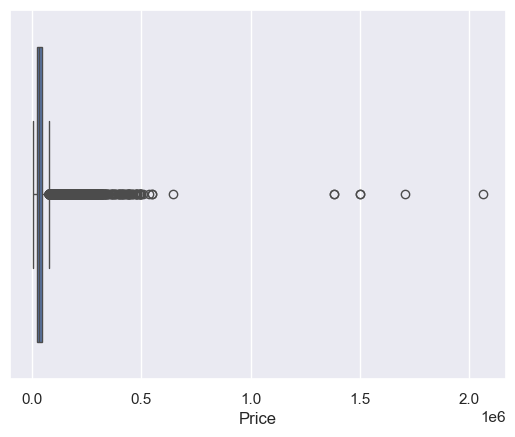

In [ ]:

#Detecting Outliers
sns.boxplot(x=df["Price"])



<Axes: xlabel='HP'>

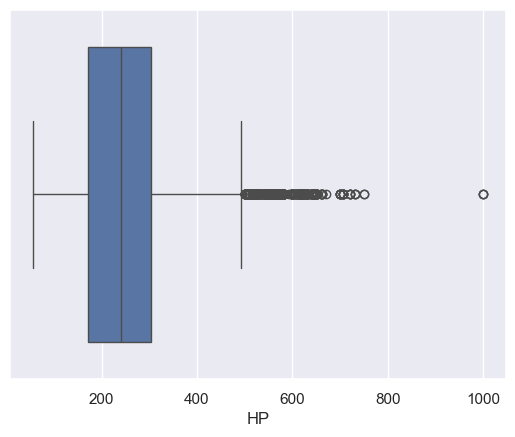

In [ ]:
sns.boxplot(x=df["HP"])

<Axes: xlabel='Year'>

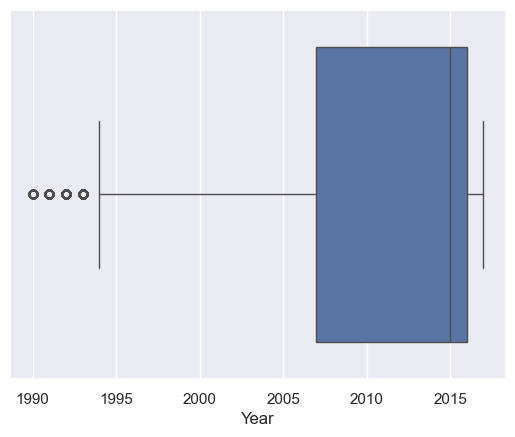

In [ ]:
sns.boxplot(x=df["Year"])

In [ ]:
#Removing outliers
num_df = df.select_dtypes(include=['int64','float64'])
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1

outlier_condition=((num_df<(Q1 - (1.5*IQR)))|(num_df>(Q3+(1.5*IQR)))).any(axis=1)

df_filtered = df[~outlier_condition]


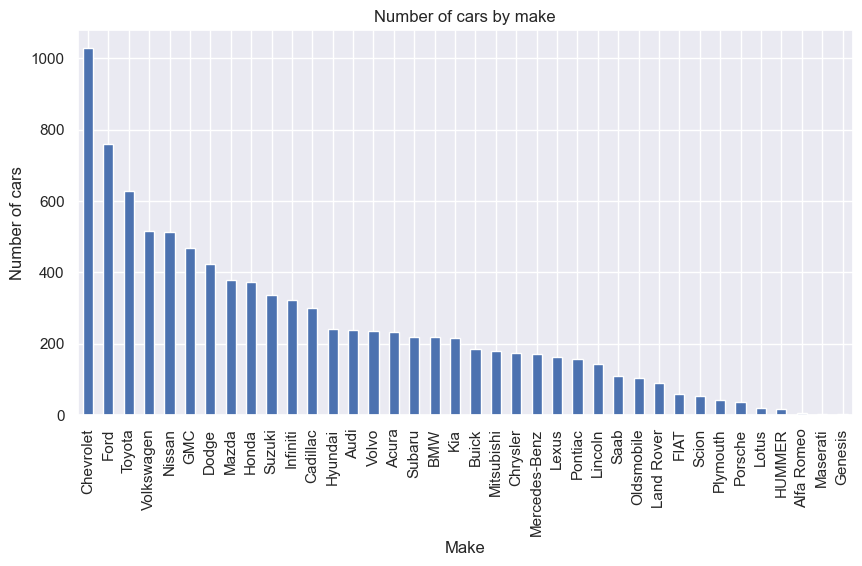

In [ ]:
#Creating Visual Representations of cleaned data

#Histogram
df_filtered.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

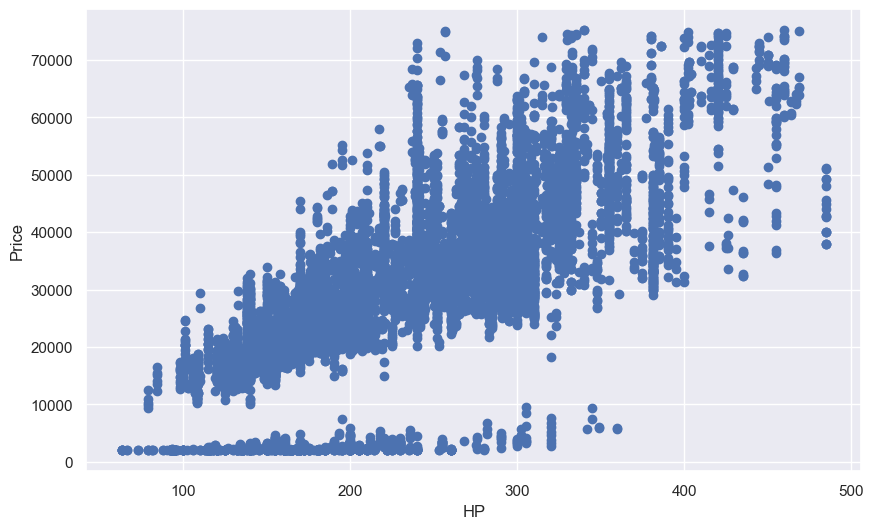

In [ ]:
#Scatterplot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['HP'], df_filtered['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [5]:
df.corr(numeric_only=True)

,Year,HP,No. of Cylinders,Highway MPG,City MPG,Price
Year,1.000000,0.337059,-0.026783,0.265428,0.219938,0.209204
HP,0.337059,1.000000,0.788598,-0.424009,-0.474992,0.659421
No. of Cylinders,-0.026783,0.788598,1.000000,-0.614830,-0.634503,0.552647
Highway MPG,0.265428,-0.424009,-0.614830,1.000000,0.842855,-0.208159
City MPG,0.219938,-0.474992,-0.634503,0.842855,1.000000,-0.233029
Price,0.209204,0.659421,0.552647,-0.208159,-0.233029,1.000000


<Axes: >

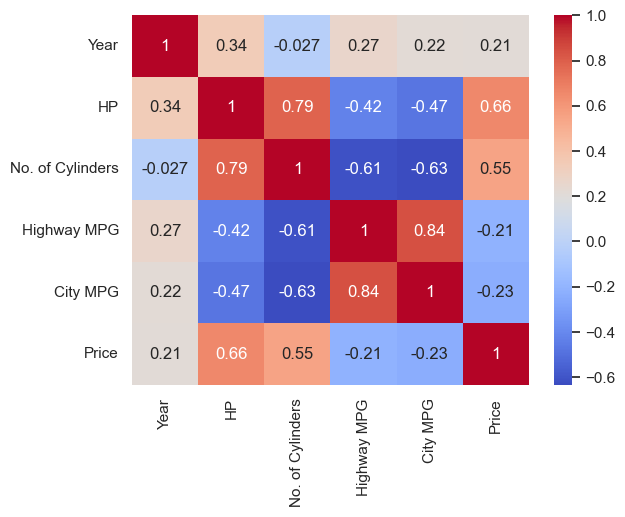

In [6]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')